In [1]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.figsize'] = (10,8)

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from biokit.viz import corrplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#To encode categorical variable
from sklearn.preprocessing import OneHotEncoder

#normalizarion
from sklearn import preprocessing
#Regressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
test_data=pd.read_csv(r'C:\Users\Chi\Documents\Cornell Tech\Class_CT\AML\HW2\test.csv')
train_data=pd.read_csv(r'C:\Users\Chi\Documents\Cornell Tech\Class_CT\AML\HW2\train.csv')

In [4]:
train_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

###### (b) Tell us about the data. How many samples are there in the training set? How many features?

In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
categorical = train_data.select_dtypes(include=['object']) 
#store all the catogorical columns
print(len(categorical.columns))
categorical.columns

43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
numerical = train_data.select_dtypes(exclude=['object'])
print(len(numerical.columns))
numerical.columns

38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

(c) What variables seem to be important? Which seem to correlate with the sale price? Plot the
relationship between sale price and year of sale, GarageArea, lot area, and other variables of
your choice. Choose 7 variables and, along with the response variable, make a scatterplot
matrix

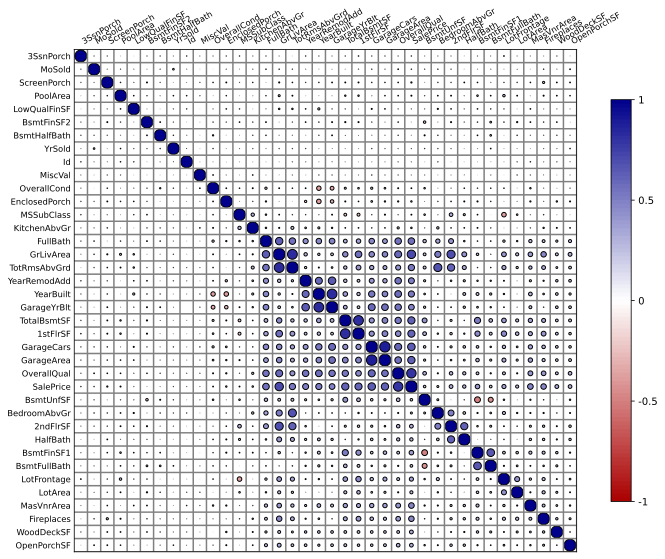

In [8]:
corrMatrix = train_data.corr()
c = corrplot.Corrplot(corrMatrix)
c.plot(method='circle')
plt.show() #Plot the coefficient matrix

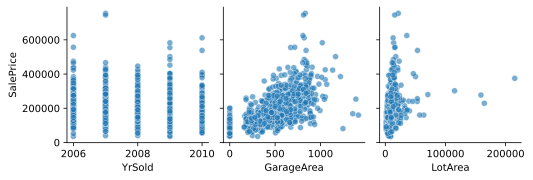

In [9]:
sns.pairplot(train_data, x_vars = ['YrSold','GarageArea','LotArea'], 
             y_vars = 'SalePrice', plot_kws = {'alpha': 0.6})

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

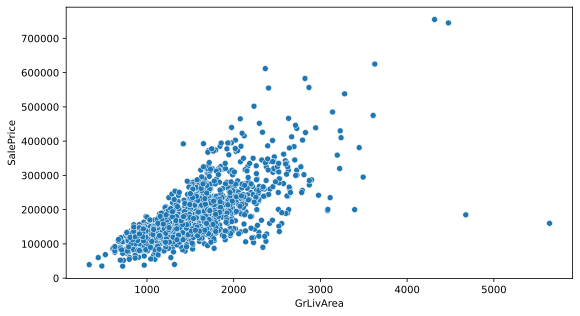

In [10]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
sns.scatterplot(x =train_data.GrLivArea, y = train_data.SalePrice, ax = ax)

Garage Area and GarageCars are both positively correlated to SalePrice respectively. This is consistent to what we usually observe — that bigger houses can afford to have larger garage areas for owners to store not one, but multiple cars. This would, therefore, drive up prices of the house. “GarageArea” and “GarageCars” could both possibly be significant variables associated with SalePrice.

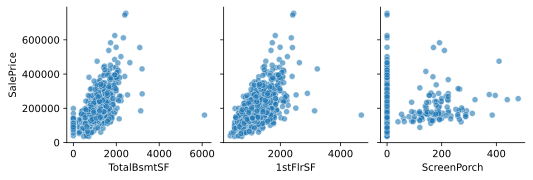

In [11]:
sns.pairplot(train_data, x_vars = ['TotalBsmtSF','1stFlrSF','ScreenPorch'], y_vars = 'SalePrice', plot_kws = {'alpha': 0.6})

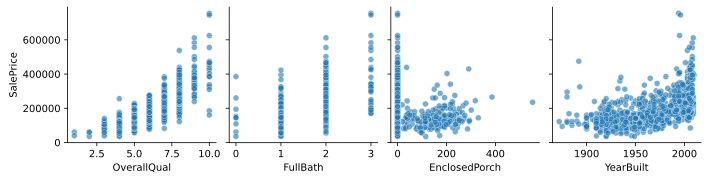

In [12]:
sns.pairplot(train_data, x_vars = ['OverallQual','FullBath','EnclosedPorch','YearBuilt'], y_vars = 'SalePrice', plot_kws = {'alpha': 0.6})

In [13]:
train_data.isnull().sum() #Many columns with more than 1000 missing values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
def find_column_na(dataframe,na_limit):
    '''Find columns which have NA values and find columns with number of rows as NA for na_limit we set.'''
    dataframe_null_check = dataframe.isnull()
    dataframe_null_check_sum = dataframe_null_check.sum()
    columnlist=[]
    for i in range(0,len(dataframe_null_check_sum)):
        if(dataframe_null_check_sum[i]>na_limit):
            print(dataframe_null_check_sum.index[i],dataframe_null_check_sum[i])
            columnlist.append(dataframe.columns[i])
    return columnlist

def drop_na_column(na_columns,dataframe):
    '''Drop the column from dataframe'''
    return dataframe.drop(columns=na_columns)

In [15]:
#Find columns with too many missing values
na_column = find_column_na(train_data,1000) 
na_column

Alley 1369
PoolQC 1453
Fence 1179
MiscFeature 1406


['Alley', 'PoolQC', 'Fence', 'MiscFeature']

##### Observe that 'Alley', 'PoolQC', 'Fence', 'MiscFeature' has too many missing value, so drop these columns

In [16]:
# Drop categorical features with too many NA values
train_data_dropna = drop_na_column(na_column,train_data) 

#### For the rest numerical columns that has missing values, fill the missing values with mean

In [17]:
def replaceNumBlankwithMeans(dataframe,num_columns):
    '''Fill the missing numerical value with colmuns mean'''
    data_no_blank = dataframe.copy()
    for col in num_columns:
            data_no_blank[col].fillna(data_no_blank[col].mean(), inplace=True)
    return data_no_blank

In [18]:
numerical_nona = train_data_dropna.select_dtypes(exclude=['object']) #name of the numerical columns
train_data_dropna_no_num_blank = replaceNumBlankwithMeans(train_data_dropna,numerical_nona)
train_data_dropna_no_num_blank.drop('SalePrice',axis=1, inplace=True) #drop the Saleprice, which will be our y
train_data_dropna_no_num_blank.drop('Id',axis=1, inplace=True) #drop ID columns, which is not related to our prediction

In [19]:
def replaceNumBlankwithString(dataframe,cat_columns):
    '''Fill the missing categorical column with mode'''
    data_no_blank = dataframe
    for col in cat_columns:
            #data_no_blank[col].fillna('Other', inplace=True)
            data_no_blank[col].fillna(data_no_blank[col].mode()[0], inplace=True)
    return data_no_blank

In [20]:
categorical_nona = train_data_dropna.select_dtypes(include=['object']) #Names of the catigorical columns
train_data_dropna_no_num_cat_blank = replaceNumBlankwithString(train_data_dropna_no_num_blank,categorical_nona)
train_data_dropna_no_num_cat_blank.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl  ...          61             0         0   
1    AllPub       FR2       Gtl  ...           0             0         0   
2    AllPub    Inside       Gtl  ...          42             0         0   
3    AllPub    Corner       Gtl  ...          35           272         0   
4    AllPub       FR2       Gtl  ...          84             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0           0        0        0       2    2008        WD        Normal  
1           0        0        0       5    2007        WD        Normal  
2           0        0        0       9    2008        WD        Normal  
3           0        0        0       2    2006        WD       Abnorml  
4           0        0        0      12    2008        WD        Normal  

[5 rows x 75 columns]

In [21]:
train_data_dropna_no_num_cat_blank.isnull().sum()
new_train = train_data_dropna_no_num_cat_blank
new_train.shape

(1460, 75)

In [22]:
# Standard Scaling of data
def do_standardscaling(X):
    cols = X.columns
    X_scaled = StandardScaler().fit_transform(X)
    return pd.DataFrame(X_scaled, columns=cols)

In [23]:
numerical_new = new_train.select_dtypes(exclude=['object'])
new_train_scale = new_train[numerical_new.columns]
new_train_standardscale = do_standardscaling(new_train_scale)
new_train_standardscale

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.073375    -0.229372 -0.207142     0.651479    -0.517200   1.050994   
1      -0.872563     0.451936 -0.091886    -0.071836     2.179628   0.156734   
2       0.073375    -0.093110  0.073480     0.651479    -0.517200   0.984752   
3       0.309859    -0.456474 -0.096897     0.651479    -0.517200  -1.863632   
4       0.073375     0.633618  0.375148     1.374795    -0.517200   0.951632   
...          ...          ...       ...          ...          ...        ...   
1455    0.073375    -0.365633 -0.260560    -0.071836    -0.517200   0.918511   
1456   -0.872563     0.679039  0.266407    -0.071836     0.381743   0.222975   
1457    0.309859    -0.183951 -0.147810     0.651479     3.078570  -1.002492   
1458   -0.872563    -0.093110 -0.080160    -0.795151     0.381743  -0.704406   
1459   -0.872563     0.224833 -0.058112    -0.795151     0.381743  -0.207594   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0         0.878668    0.511418    0.575425   -0.288653  ...    0.351000   
1        -0.429577   -0.574410    1.171992   -0.288653  ...   -0.060731   
2         0.830215    0.323060    0.092907   -0.288653  ...    0.631726   
3        -0.720298   -0.574410   -0.499274   -0.288653  ...    0.790804   
4         0.733308    1.364570    0.463568   -0.288653  ...    1.698485   
...            ...         ...         ...         ...  ...         ...   
1455      0.733308   -0.574410   -0.973018   -0.288653  ...   -0.060731   
1456      0.151865    0.084843    0.759659    0.722112  ...    0.126420   
1457      1.024029   -0.574410   -0.369871   -0.288653  ...   -1.033914   
1458      0.539493   -0.574410   -0.865548    6.092188  ...   -1.090059   
1459     -0.962566   -0.574410    0.847389    1.509640  ...   -0.921624   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0      -0.752176     0.216503      -0.359325  -0.116339    -0.270208   
1       1.626195    -0.704483      -0.359325  -0.116339    -0.270208   
2      -0.752176    -0.070361      -0.359325  -0.116339    -0.270208   
3      -0.752176    -0.176048       4.092524  -0.116339    -0.270208   
4       0.780197     0.563760      -0.359325  -0.116339    -0.270208   
...          ...          ...            ...        ...          ...   
1455   -0.752176    -0.100558      -0.359325  -0.116339    -0.270208   
1456    2.033231    -0.704483      -0.359325  -0.116339    -0.270208   
1457   -0.752176     0.201405      -0.359325  -0.116339    -0.270208   
1458    2.168910    -0.704483       1.473789  -0.116339    -0.270208   
1459    5.121921     0.322190      -0.359325  -0.116339    -0.270208   

      PoolArea   MiscVal    MoSold    YrSold  
0    -0.068692 -0.087688 -1.599111  0.138777  
1    -0.068692 -0.087688 -0.489110 -0.614439  
2    -0.068692 -0.087688  0.990891  0.138777  
3    -0.068692 -0.087688 -1.599111 -1.367655  
4    -0.068692 -0.087688  2.100892  0.138777  
...        ...       ...       ...       ...  
1455 -0.068692 -0.087688  0.620891 -0.614439  
1456 -0.068692 -0.087688 -1.599111  1.645210  
1457 -0.068692  4.953112 -0.489110  1.645210  
1458 -0.068692 -0.087688 -0.859110  1.645210  
1459 -0.068692 -0.087688 -0.119110  0.138777  

[1460 rows x 36 columns]

In [24]:
def find_categ_column(dataframe):
    return dataframe.select_dtypes(exclude=["number","bool_"]).columns

In [25]:
def one_hot_encode_beta(train, test):
    '''
    This function can one hot encode the training data and the testing data at the same time, since we want to one hot encode 
    the training data and testing data in the same format. But we're just process the testing data here, and only use it in the 
    last question 
    '''
    enc = OneHotEncoder(handle_unknown='ignore') 
    onehotencoded = train.copy()
    onehotencoded_test = test.copy()
    
    for col in train.columns:
        enc.fit(train[[col]]) # use two square brackets to make it as 2 dimensional
        
        # handling train data
        temp = enc.transform(train[[col]])
        temp = pd.DataFrame(temp.todense(), columns=[(col+"_"+str(i)) for i in train[col].value_counts().index])
        temp = temp.set_index(train.index.values)
        onehotencoded = pd.concat([onehotencoded,temp],axis=1)
        onehotencoded = onehotencoded.drop(col,axis=1)
        
        # handling test data
        temp = enc.transform(test[[col]])
        temp = pd.DataFrame(temp.todense(), columns=[(col+"_"+str(i)) for i in train[col].value_counts().index])
        temp = temp.set_index(test.index.values)
        onehotencoded_test = pd.concat([onehotencoded_test, temp],axis=1)
        onehotencoded_test = onehotencoded_test.drop(col, axis=1)
        
    return onehotencoded, onehotencoded_test

In [26]:
#UnEncoded the training data
cat_columns = find_categ_column(new_train)
housing_data_cat_col = new_train[cat_columns]

In [30]:
#Try to process the testing data here: remoing the missing value and sanderdize. Will only use it in the last question (h)
numerical_na = test_data.select_dtypes(exclude=['object'])
test_data_no_nanum = replaceNumBlankwithMeans(test_data,numerical_na)

categorical_na = test_data.select_dtypes(include=['object']) #Names of the catigorical columns
test_data_no_nacat = replaceNumBlankwithString(test_data_no_nanum,categorical_na)

test_data_no_nacat = drop_na_column(na_column,test_data_no_nacat)
new_test = test_data_no_nacat
new_test.drop("Id", axis = 1, inplace = True)

numerical = new_test.select_dtypes(exclude=['object'])
new_test_scale = new_test[numerical.columns]
new_test_standardscale = do_standardscaling(new_test_scale)

In [31]:
cat_test_columns = find_categ_column(new_test)
test_cat_col = new_test[cat_test_columns]
test_cat_col

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RH   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave      IR1         HLS    AllPub    Inside       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1454       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0           NAmes      Feedr       Norm  ...          TA        Typ   
1           NAmes       Norm       Norm  ...          Gd        Typ   
2         Gilbert       Norm       Norm  ...          TA        Typ   
3         Gilbert       Norm       Norm  ...          Gd        Typ   
4         StoneBr       Norm       Norm  ...          Gd        Typ   
...           ...        ...        ...  ...         ...        ...   
1454      MeadowV       Norm       Norm  ...          TA        Typ   
1455      MeadowV       Norm       Norm  ...          TA        Typ   
1456      Mitchel       Norm       Norm  ...          TA        Typ   
1457      Mitchel       Norm       Norm  ...          TA        Typ   
1458      Mitchel       Norm       Norm  ...          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0             Gd     Attchd          Unf         TA         TA          Y   
1             Gd     Attchd          Unf         TA         TA          Y   
2             TA     Attchd          Fin         TA         TA          Y   
3             Gd     Attchd          Fin         TA         TA          Y   
4             Gd     Attchd          RFn         TA         TA          Y   
...          ...        ...          ...        ...        ...        ...   
1454          Gd     Attchd          Unf         TA         TA          Y   
1455          Gd    CarPort          Unf         TA         TA          Y   
1456          TA     Detchd          Unf         TA         TA          Y   
1457          Gd     Attchd          Unf         TA         TA          Y   
1458          TA     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD        Normal  
4          WD        Normal  
...       ...           ...  
1454       WD        Normal  
1455       WD       Abnorml  
1456       WD       Abnorml  
1457       WD        Normal  
1458       WD        Normal  

[1459 rows x 39 columns]

In [32]:
encode_cat, encode_test = one_hot_encode_beta(housing_data_cat_col, test_cat_col)
encode_cat #the one hot encoded training categoriacal data

MSZoning_RL  MSZoning_RM  MSZoning_FV  MSZoning_RH  MSZoning_C (all)  \
0             0.0          0.0          0.0          1.0               0.0   
1             0.0          0.0          0.0          1.0               0.0   
2             0.0          0.0          0.0          1.0               0.0   
3             0.0          0.0          0.0          1.0               0.0   
4             0.0          0.0          0.0          1.0               0.0   
...           ...          ...          ...          ...               ...   
1455          0.0          0.0          0.0          1.0               0.0   
1456          0.0          0.0          0.0          1.0               0.0   
1457          0.0          0.0          0.0          1.0               0.0   
1458          0.0          0.0          0.0          1.0               0.0   
1459          0.0          0.0          0.0          1.0               0.0   

      Street_Pave  Street_Grvl  LotShape_Reg  LotShape_IR1  LotShape_IR2  ...  \
0             0.0          1.0           0.0           0.0           0.0  ...   
1             0.0          1.0           0.0           0.0           0.0  ...   
2             0.0          1.0           1.0           0.0           0.0  ...   
3             0.0          1.0           1.0           0.0           0.0  ...   
4             0.0          1.0           1.0           0.0           0.0  ...   
...           ...          ...           ...           ...           ...  ...   
1455          0.0          1.0           0.0           0.0           0.0  ...   
1456          0.0          1.0           0.0           0.0           0.0  ...   
1457          0.0          1.0           0.0           0.0           0.0  ...   
1458          0.0          1.0           0.0           0.0           0.0  ...   
1459          0.0          1.0           0.0           0.0           0.0  ...   

      SaleType_ConLw  SaleType_CWD  SaleType_Oth  SaleType_Con  \
0                0.0           0.0           0.0           1.0   
1                0.0           0.0           0.0           1.0   
2                0.0           0.0           0.0           1.0   
3                0.0           0.0           0.0           1.0   
4                0.0           0.0           0.0           1.0   
...              ...           ...           ...           ...   
1455             0.0           0.0           0.0           1.0   
1456             0.0           0.0           0.0           1.0   
1457             0.0           0.0           0.0           1.0   
1458             0.0           0.0           0.0           1.0   
1459             0.0           0.0           0.0           1.0   

      SaleCondition_Normal  SaleCondition_Partial  SaleCondition_Abnorml  \
0                      0.0                    0.0                    0.0   
1                      0.0                    0.0                    0.0   
2                      0.0                    0.0                    0.0   
3                      1.0                    0.0                    0.0   
4                      0.0                    0.0                    0.0   
...                    ...                    ...                    ...   
1455                   0.0                    0.0                    0.0   
1456                   0.0                    0.0                    0.0   
1457                   0.0                    0.0                    0.0   
1458                   0.0                    0.0                    0.0   
1459                   0.0                    0.0                    0.0   

      SaleCondition_Family  SaleCondition_Alloca  SaleCondition_AdjLand  
0                      0.0                   1.0                    0.0  
1                      0.0                   1.0                    0.0  
2                      0.0                   1.0                    0.0  
3                      0.0                   0.0                    0.0  
4                   

In [33]:
print(encode_cat.shape)

(1460, 239)


In [34]:
X = pd.concat([encode_cat, new_train_standardscale], axis=1, join="inner") #concate the numerical and categorical traing data
Y = train_data.SalePrice 
X #contain encoded categorical data and standardscale numerical data

MSZoning_RL  MSZoning_RM  MSZoning_FV  MSZoning_RH  MSZoning_C (all)  \
0             0.0          0.0          0.0          1.0               0.0   
1             0.0          0.0          0.0          1.0               0.0   
2             0.0          0.0          0.0          1.0               0.0   
3             0.0          0.0          0.0          1.0               0.0   
4             0.0          0.0          0.0          1.0               0.0   
...           ...          ...          ...          ...               ...   
1455          0.0          0.0          0.0          1.0               0.0   
1456          0.0          0.0          0.0          1.0               0.0   
1457          0.0          0.0          0.0          1.0               0.0   
1458          0.0          0.0          0.0          1.0               0.0   
1459          0.0          0.0          0.0          1.0               0.0   

      Street_Pave  Street_Grvl  LotShape_Reg  LotShape_IR1  LotShape_IR2  ...  \
0             0.0          1.0           0.0           0.0           0.0  ...   
1             0.0          1.0           0.0           0.0           0.0  ...   
2             0.0          1.0           1.0           0.0           0.0  ...   
3             0.0          1.0           1.0           0.0           0.0  ...   
4             0.0          1.0           1.0           0.0           0.0  ...   
...           ...          ...           ...           ...           ...  ...   
1455          0.0          1.0           0.0           0.0           0.0  ...   
1456          0.0          1.0           0.0           0.0           0.0  ...   
1457          0.0          1.0           0.0           0.0           0.0  ...   
1458          0.0          1.0           0.0           0.0           0.0  ...   
1459          0.0          1.0           0.0           0.0           0.0  ...   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       0.351000   -0.752176     0.216503      -0.359325  -0.116339   
1      -0.060731    1.626195    -0.704483      -0.359325  -0.116339   
2       0.631726   -0.752176    -0.070361      -0.359325  -0.116339   
3       0.790804   -0.752176    -0.176048       4.092524  -0.116339   
4       1.698485    0.780197     0.563760      -0.359325  -0.116339   
...          ...         ...          ...            ...        ...   
1455   -0.060731   -0.752176    -0.100558      -0.359325  -0.116339   
1456    0.126420    2.033231    -0.704483      -0.359325  -0.116339   
1457   -1.033914   -0.752176     0.201405      -0.359325  -0.116339   
1458   -1.090059    2.168910    -0.704483       1.473789  -0.116339   
1459   -0.921624    5.121921     0.322190      -0.359325  -0.116339   

      ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  
0       -0.270208 -0.068692 -0.087688 -1.599111  0.138777  
1       -0.270208 -0.068692 -0.087688 -0.489110 -0.614439  
2       -0.270208 -0.068692 -0.087688  0.990891  0.138777  
3       -0.270208 -0.068692 -0.087688 -1.599111 -1.367655  
4       -0.270208 -0.068692 -0.087688  2.100892  0.138777  
...           ...       ...       ...       ...       ...  
1455    -0.270208 -0.068692 -0.087688  0.620891 -0.614439  
1456    -0.270208 -0.068692 -0.087688 -1.599111  1.645210  
1457    -0.270208 -0.068692  4.953112 -0.489110  1.645210  
1458    -0.270208 -0.068692 -0.087688 -0.859110  1.645210  
1459    -0.270208 -0.068692 -0.087688 -0.119110  0.138777  

[1460 rows x 275 columns]

### Regression

we will create following function to provide regression method analysis

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=2021)

In [36]:
def regressionEvaluationMetrics(predictions,y_test,title):
    '''A function plot the relation between y-pred and y_test, compute MAE, MSE, and RMSE'''
    plt.figure(figsize=(8,6))
    plt.scatter(predictions,y_test,cmap='plasma',alpha=0.5)
    plt.xlabel('Prediction')
    plt.ylabel('Real value')
    plt.title(title)
    diagonal = np.linspace(0, np.max(y_test), 100)
    plt.plot(diagonal, diagonal, '-r')
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### OLS

In [37]:
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1., 288.,   0.,   1.,   0.,   1.]),
 array([-7.07613639e+15, -6.60751324e+15, -6.13889010e+15, -5.67026695e+15,
        -5.20164381e+15, -4.73302066e+15, -4.26439752e+15, -3.79577437e+15,
        -3.32715123e+15, -2.85852808e+15, -2.38990494e+15, -1.92128179e+15,
        -1.45265865e+15, -9.84035501e+14, -5.15412355e+14, -4.67892100e+13,
         4.21833935e+14,  8.90457081e+14,  1.35908023e+15,  1.82770337e+15,
         2.29632652e+15]),
 <BarContainer object of 20 artists>)

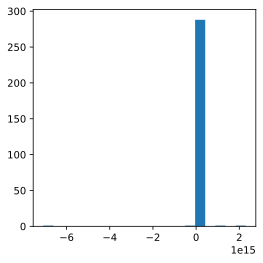

In [38]:
#The prediction contain 4 outliers, try to find and remove them
plt.figure(figsize=(4, 4))
plt.hist(Y_pred, bins=20)

In [39]:
non_outliers = (-4.67892100e+13 < Y_pred) & (Y_pred < 4.21833935e+14)

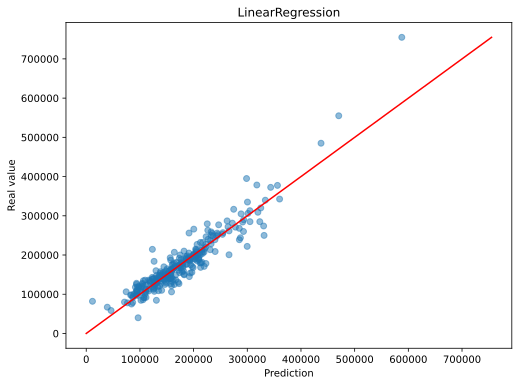

Mean Absolute Error: 17463.802083333332
Mean Squared Error: 672893428.0659722
Root Mean Squared Error: 25940.18943774259


In [40]:
# removed outliers
regressionEvaluationMetrics(Y_pred[non_outliers], Y_test[non_outliers], 'LinearRegression')

### k-Nearest Neighbors with 10-fold cross validation to choose k

In [41]:
#KNN
knn_model = KNeighborsRegressor()
param_grid = {'n_neighbors':np.arange(5, 100, 5)}

gsModelTrain = GridSearchCV(estimator = knn_model, param_grid = param_grid, cv=10) #10 fold cross validation
gsModelTrain.fit(X_train, Y_train)

knn_model.set_params(**gsModelTrain.best_params_)

#Get the best K parameter for KNN
print(gsModelTrain.best_params_)

#fit to train data
knn_model.fit(X_train, Y_train)
print('The accuracy for knn is ', knn_model.score(X_test, Y_test))

{'n_neighbors': 20}
The accuracy for knn is  0.7751410782398651


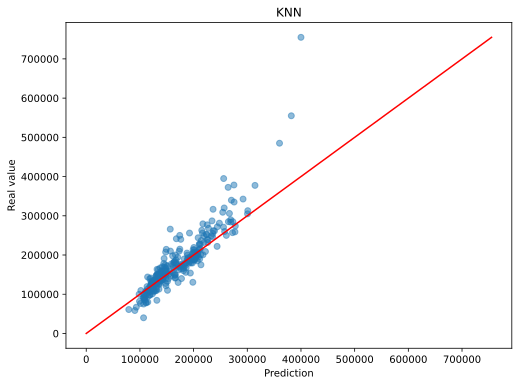

Mean Absolute Error: 20522.903767123287
Mean Squared Error: 1312164709.8905308
Root Mean Squared Error: 36223.814126766534


In [42]:
Y_pred_knn = knn_model.predict(X_test)
regressionEvaluationMetrics(Y_pred_knn,Y_test,'KNN')

### Ridge regression with 10-fold cross validation to chose lamda¸

In [43]:
rig = RidgeCV(alphas=(1.0, 3.0, 10.0, 30.0, 100), cv=10)
rig.fit(X_train, Y_train)
print('rig.alpha_ = ', rig.alpha_)

Y_pred_rig = rig.predict(X_test)
print('The accuracy for Ridge Regression is ', rig.score(X_test, Y_test))

rig.alpha_ =  30.0
The accuracy for Ridge Regression is  0.8726924017580668


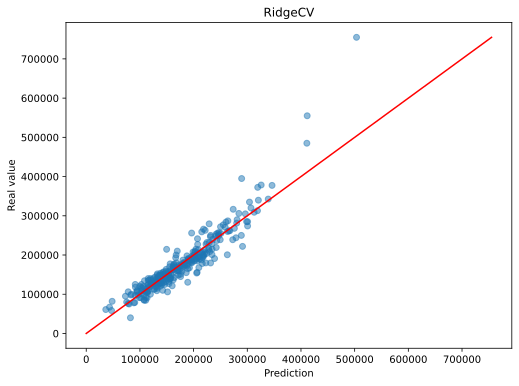

Mean Absolute Error: 16838.47044828797
Mean Squared Error: 742903756.7483457
Root Mean Squared Error: 27256.26087247379


In [44]:
regressionEvaluationMetrics(Y_pred_rig,Y_test,'RidgeCV')

### LASSO with 10-fold cross validation to chose lamda¸

In [45]:
lasso = LassoCV(alphas = (1.0, 3.0, 10.0, 30.0, 100, 200, 300), cv=10, max_iter=5000)
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)

print('lasso.alpha_ = ',lasso.alpha_)
print('The accuracy for Lasso Regression is ', lasso.score(X_test, Y_test))

lasso.alpha_ =  200.0
The accuracy for Lasso Regression is  0.8839952195287891


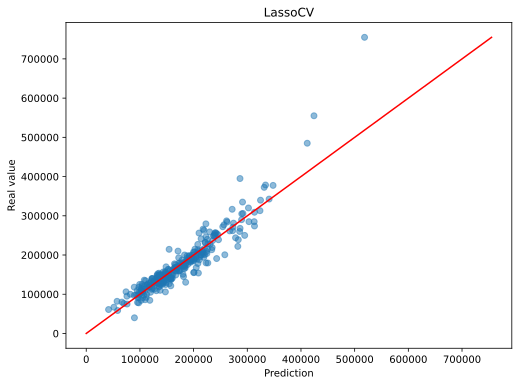

Mean Absolute Error: 16119.557400762129
Mean Squared Error: 676946139.9236672
Root Mean Squared Error: 26018.18863648404


In [46]:
regressionEvaluationMetrics(Y_pred_lasso, Y_test, 'LassoCV')

### (f) Repeat the above, except for OLS, after adding all the quadratic features: Xi j Xik for all j  (this includes X2 i j ).

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
trans = PolynomialFeatures(degree=2)
poly_num_data = trans.fit_transform(new_train_standardscale)
poly_num_data = pd.DataFrame(poly_num_data)

poly_data = pd.concat([encode_cat, poly_num_data], axis=1, join="inner")

In [52]:
shape(poly_num_data)

(1460, 703)

In [53]:
poly_data

MSZoning_RL  MSZoning_RM  MSZoning_FV  MSZoning_RH  MSZoning_C (all)  \
0             0.0          0.0          0.0          1.0               0.0   
1             0.0          0.0          0.0          1.0               0.0   
2             0.0          0.0          0.0          1.0               0.0   
3             0.0          0.0          0.0          1.0               0.0   
4             0.0          0.0          0.0          1.0               0.0   
...           ...          ...          ...          ...               ...   
1455          0.0          0.0          0.0          1.0               0.0   
1456          0.0          0.0          0.0          1.0               0.0   
1457          0.0          0.0          0.0          1.0               0.0   
1458          0.0          0.0          0.0          1.0               0.0   
1459          0.0          0.0          0.0          1.0               0.0   

      Street_Pave  Street_Grvl  LotShape_Reg  LotShape_IR1  LotShape_IR2  ...  \
0             0.0          1.0           0.0           0.0           0.0  ...   
1             0.0          1.0           0.0           0.0           0.0  ...   
2             0.0          1.0           1.0           0.0           0.0  ...   
3             0.0          1.0           1.0           0.0           0.0  ...   
4             0.0          1.0           1.0           0.0           0.0  ...   
...           ...          ...           ...           ...           ...  ...   
1455          0.0          1.0           0.0           0.0           0.0  ...   
1456          0.0          1.0           0.0           0.0           0.0  ...   
1457          0.0          1.0           0.0           0.0           0.0  ...   
1458          0.0          1.0           0.0           0.0           0.0  ...   
1459          0.0          1.0           0.0           0.0           0.0  ...   

           693       694       695       696        697       698       699  \
0     0.004719  0.006023  0.109846 -0.009533   0.007689  0.140223 -0.012169   
1     0.004719  0.006023  0.033598  0.042207   0.007689  0.042889  0.053879   
2     0.004719  0.006023 -0.068066 -0.009533   0.007689 -0.086889 -0.012169   
3     0.004719  0.006023  0.109846  0.093947   0.007689  0.140223  0.119927   
4     0.004719  0.006023 -0.144314 -0.009533   0.007689 -0.184223 -0.012169   
...        ...       ...       ...       ...        ...       ...       ...   
1455  0.004719  0.006023 -0.042650  0.042207   0.007689 -0.054445  0.053879   
1456  0.004719  0.006023  0.109846 -0.113012   0.007689  0.140223 -0.144265   
1457  0.004719 -0.340238  0.033598 -0.113012  24.533314 -2.422617  8.148907   
1458  0.004719  0.006023  0.059014 -0.113012   0.007689  0.075334 -0.144265   
1459  0.004719  0.006023  0.008182 -0.009533   0.007689  0.010444 -0.012169   

           700       701       702  
0     2.557156 -0.221921  0.019259  
1     0.239229  0.300528  0.377535  
2     0.981866  0.137513  0.019259  
3     2.557156  2.187032  1.870479  
4     4.413749  0.291557  0.019259  
...        ...       ...       ...  
1455  0.385506 -0.381499  0.377535  
1456  2.557156 -2.630873  2.706715  
1457  0.239229 -0.804689  2.706715  
1458  0.738071 -1.413417  2.706715  
1459  0.014187 -0.016530  0.019259  

[1460 rows x 942 columns]

In [54]:
X_train_po, X_test_po, Y_train, Y_test = train_test_split(poly_data, Y, test_size=.2,
                                                    random_state=2021)

### Knn after adding qrudratic feature

In [55]:
#KNN for poly feature
knn_model_poly = KNeighborsRegressor()
param_grid = {'n_neighbors':np.arange(5, 100, 5)}

gsModelTrain_poly = GridSearchCV(estimator = knn_model_poly, param_grid = param_grid, cv=10)
gsModelTrain_poly.fit(X_train_po, Y_train)

knn_model_poly.set_params(**gsModelTrain_poly.best_params_)

#Get the best K parameter for KNN (K=20)
gsModelTrain_poly.best_params_

{'n_neighbors': 10}

In [56]:
#fit to train data
knn_model_poly.fit(X_train_po, Y_train)

print('The accuracy for knn is ', knn_model_poly.score(X_test_po, Y_test))
Y_pred_po_knn = knn_model_poly.predict(X_test_po)

The accuracy for knn is  0.7542514345895475


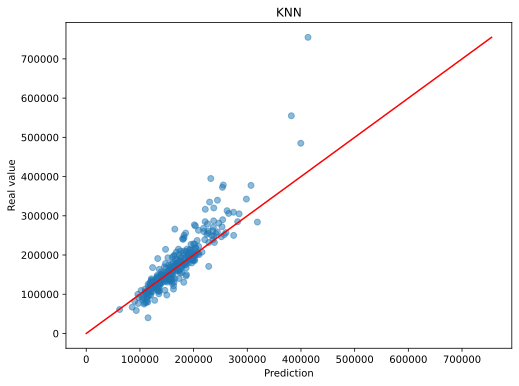

Mean Absolute Error: 22019.625
Mean Squared Error: 1434066269.2574997
Root Mean Squared Error: 37869.06744636709


In [57]:
regressionEvaluationMetrics(Y_pred_po_knn,Y_test,'KNN')

### Ridge after adding qrudratic feature

In [58]:
rig_poly = RidgeCV(alphas=(1.0, 3.0, 10.0, 30.0, 100, 200, 300), cv=10)
rig_poly.fit(X_train_po, Y_train)
Y_pred_po_rig = rig_poly.predict(X_test_po)

print('rig.alpha', rig_poly.alpha_)
print('The accuracy for Ridge Regression is ', rig_poly.score(X_test_po, Y_test))

rig.alpha 300.0
The accuracy for Ridge Regression is  0.836361819431884


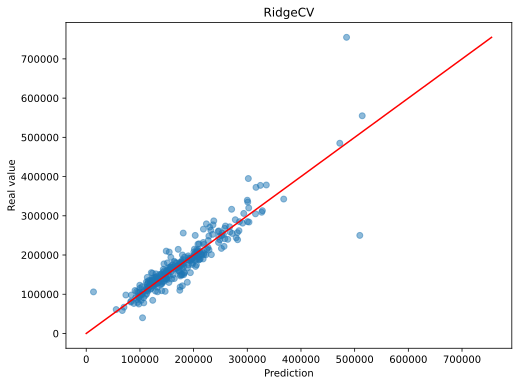

Mean Absolute Error: 17150.037611111107
Mean Squared Error: 954910946.1675088
Root Mean Squared Error: 30901.633389960294


In [59]:
regressionEvaluationMetrics(Y_pred_po_rig,Y_test,'RidgeCV')

### Lasso after adding qrudratic feature

In [60]:
lasso_poly = LassoCV(alphas=(1.0, 3.0, 10.0, 30.0, 100, 200, 300), cv=10, tol=0.001)
lasso_poly.fit(X_train_po, Y_train)
Y_pred_po_lasso = lasso_poly.predict(X_train_po)

c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13178092821.9095, tolerance: 6723258882.498479
  tol, rng, random, positive)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33975175549.242645, tolerance: 6723258882.498479
  tol, rng, random, positive)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40542029314.452415, tolerance: 6723258882.498479
  tol, rng, random, positive)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packa

c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39035177565.84944, tolerance: 6381085542.092082
  tol, rng, random, positive)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34821154277.29236, tolerance: 6985996506.799122
  tol, rng, random, positive)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43118921882.06208, tolerance: 6985996506.799122
  tol, rng, random, positive)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packag

In [61]:
print(lasso_poly.alpha_)
print('The accuracy for Lasso Regression is ', lasso_poly.score(X_test_po, Y_test))

300.0
The accuracy for Lasso Regression is  0.859907077528587


#### (g) Which variables are being retained by LASSO and which are regularized away?
#### Do these variables match your intuitions about which variables are important and which are not? 
#### Compare this to (d).

In [62]:
feature_name = np.array(X_train.columns)
#Get the 
discard = {}
retain = {}
for i in range(0, len(lasso.coef_)):
    if -1 < lasso.coef_[i] < 1:
        discard[feature_name[i]] = lasso.coef_[i]
    else:
        retain[feature_name[i]] = lasso.coef_[i]

In [68]:
print('number of discard feature:', len(discard))
discard

number of discard feature: 190


{'MSZoning_RL': -0.0,
 'MSZoning_RM': 0.0,
 'MSZoning_FV': 0.0,
 'MSZoning_RH': 0.0,
 'Street_Pave': -0.0,
 'Street_Grvl': 0.0,
 'LotShape_Reg': -0.0,
 'LotShape_IR2': -0.0,
 'LotShape_IR3': 0.0,
 'LandContour_Bnk': 0.0,
 'LandContour_HLS': -0.0,
 'LandContour_Low': 0.0,
 'Utilities_AllPub': 0.0,
 'Utilities_NoSeWa': -0.0,
 'LotConfig_Inside': 0.0,
 'LotConfig_FR2': -0.0,
 'LotConfig_FR3': -0.0,
 'LandSlope_Gtl': -0.0,
 'LandSlope_Sev': -0.0,
 'Neighborhood_NAmes': -0.0,
 'Neighborhood_CollgCr': -0.0,
 'Neighborhood_OldTown': -0.0,
 'Neighborhood_Somerst': -0.0,
 'Neighborhood_Gilbert': 0.0,
 'Neighborhood_NWAmes': -0.0,
 'Neighborhood_SawyerW': -0.0,
 'Neighborhood_BrkSide': 0.0,
 'Neighborhood_NoRidge': 0.0,
 'Neighborhood_SWISU': -0.0,
 'Neighborhood_MeadowV': 0.0,
 'Neighborhood_Blmngtn': -0.0,
 'Neighborhood_NPkVill': -0.0,
 'Neighborhood_Blueste': 0.0,
 'Condition1_Norm': -0.0,
 'Condition1_Feedr': -0.0,
 'Condition1_RRAn': 0.0,
 'Condition1_PosN': -0.0,
 'Condition1_RRAe': -0.0,

In [69]:
print('numer of retain features:', len(retain))
retain

numer of retain features: 85


{'MSZoning_C (all)': -2737.5421753549213,
 'LotShape_IR1': 5372.430827265942,
 'LandContour_Lvl': -11516.245476716687,
 'LotConfig_Corner': 7794.442371510756,
 'LotConfig_CulDSac': -2125.4720476430766,
 'LandSlope_Mod': 2369.1410714357976,
 'Neighborhood_Edwards': 1722.6758059714978,
 'Neighborhood_NridgHt': 20239.845832273106,
 'Neighborhood_Sawyer': -8811.40670085032,
 'Neighborhood_Crawfor': -2752.0637926061363,
 'Neighborhood_Mitchel': -1150.2864054569823,
 'Neighborhood_Timber': -738.062709855706,
 'Neighborhood_IDOTRR': 39157.63861202322,
 'Neighborhood_ClearCr': 24444.573676903034,
 'Neighborhood_StoneBr': -399.5861212095954,
 'Neighborhood_BrDale': 8149.959594687372,
 'Neighborhood_Veenker': 36121.62514990237,
 'Condition1_Artery': 8549.143994952014,
 'Condition2_PosN': -40752.11924437313,
 'BldgType_1Fam': 3416.5593940942454,
 'BldgType_TwnhsE': 1119.4133750372173,
 'HouseStyle_1.5Fin': 2554.5733791208218,
 'HouseStyle_1.5Unf': -2372.075400701425,
 'RoofStyle_Gambrel': 1262.27

(h) Train your best-performing classifier with all of the training datadata, and generate test labels on
the Kaggle test set. Submit your results to Kaggle and report the accuracy.

First, used our processed the test_data:

In [71]:
x_test = pd.concat([encode_test, new_test_standardscale], axis=1, join="inner")

In [72]:
Lasso = LassoCV(alphas=(0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100), cv=10)
Lasso.fit(X, Y)
Y_pred_test_lasso = Lasso.predict(x_test)

c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11271862562.505005, tolerance: 852398977.1246127
  tol, rng, random, positive)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15016227400.589478, tolerance: 852398977.1246127
  tol, rng, random, positive)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14104908293.096924, tolerance: 827439703.8697119
  tol, rng, random, positive)


In [73]:
Lasso.alpha_

100.0

In [74]:
len(Y_pred_test_lasso)

1459

In [76]:
Y_pred_test_lasso = pd.DataFrame(Y_pred_test_lasso)

In [77]:
result = pd.concat([test_data['Id'], Y_pred_test_lasso], axis=1)

In [79]:
result.to_csv('answer.csv', index=False, header=['Id', 'SalePrice'])